# Приоритизация гипотез и анализ A/B-теста в интернет-магазине

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

#### Цель проекта

Проект состоит из двух частей и имеет следующие цели:

**1. Приоритизация гипотез для запуска A/B-теста:**

    * Проверить гипотезы по фреймворкам ICE и RICE и определить лучшую гипотезу для тестирования.
    

**2. Провести A/B-тест:**

    * Проанализировать результаты теста.
    * Принять решение о продолжении или завершении теста.

#### Задачи необходимые для проведения анализа результатов A/B-теста:

* Построить график кумулятивной выручки по группам.
* Построить график кумулятивного среднего чека по группам.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
* Построить график кумулятивной конверсии по группам.
* Построить график относительного изменения кумулятивной конверсии группы B к группе A.
* Построить точечный график количества заказов по пользователям.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границы для определения аномальных пользователей.
* Построить точечный график стоимостей заказов.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границы для определения аномальных заказов.
* Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
* Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
* Сделать выводы и предположения.

### Описание полученных данных

**Данные для приоритизации гипотез для запуска A/B-теста:**

1. Файл `hypothesis.csv`:
    * `Hypothesis` — краткое описание гипотезы;
    * `Reach` — охват пользователей по 10-балльной шкале;
    * `Impact` — влияние на пользователей по 10-балльной шкале;
    * `Confidence` — уверенность в гипотезе по 10-балльной шкале;
    * `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    
    
**Данные по результатам A/B-теста:**

1. Файл `orders.csv`:
    * transactionId — идентификатор заказа;
    * visitorId — идентификатор пользователя, совершившего заказ;
    * date — дата, когда был совершён заказ;
    * revenue — выручка заказа;
    * group — группа A/B-теста, в которую попал заказ.
    

2. Файл `visitors.csv`:
    * `date` — дата;
    * `group` — группа A/B-теста;
    * `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

## Подготовка данных

### Загрузка данных и библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

### Загрузка файлов

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv').copy()
    orders = pd.read_csv('/datasets/orders.csv').copy()
    visitors = pd.read_csv('/datasets/visitors.csv').copy()
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv').copy()
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv').copy()
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv').copy()    

### Приоритизация гипотез

In [3]:
# выведем таблицу гипотез, предварительно увеличив ширину столбцов
pd.options.display.max_colwidth = 1
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Приоритизация гипотез по ICE

In [4]:
# добавим столбец к таблице с рейтингом ICE, округлим до 3 знаков после запятой, отсортируем и выведем результат
hypothesis['ice'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis.sort_values(by='ice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Приоритизация гипотез по RICE

In [5]:
# добавим столбец к таблице с рейтингом RICE, отсортируем и выведем результат
hypothesis['rice'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by='rice', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод по приоритетам гипотез

В нашем случае наиболее подходящий фреймворк для приоритизации гипотез является фреймворк RICE, так как этот фреймворк учитывает охват гипотезы. Поэтому наиболее перспективные гипотезы будут следующие:

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
При этом гипотеза с добавление формы подписки имеет рейтинг в два раза больше, чем гипотеза с добавлением блоков с рекомендациями товаров, за счет высоких показателей охвата изменений, влияния и уверенности при средний расходах на внедрение.

## Анализ A/B-теста

### Изучение и подготовка данных

In [6]:
# выведем таблицу orders
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# выведем информацию по таблице
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [8]:
# выведем таблицу visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# выведем информацию по таблице visitors
visitors.info()
visitors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [10]:
# проверим есть ли дубликаты в таблице visitors и orders
visitors.duplicated().sum(), orders.duplicated().sum()

(0, 0)

In [11]:
# переименуем название столбцов в таблице orders в надлежащий вид
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
# переведем столбцы с датами во временной тип
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

In [13]:
# проверим совпадают ли даты в файлах
display('Период заказов', orders['date'].min(), orders['date'].max(),
'Период пользователей', visitors['date'].min(), visitors['date'].max())

'Период заказов'

datetime.date(2019, 8, 1)

datetime.date(2019, 8, 31)

'Период пользователей'

datetime.date(2019, 8, 1)

datetime.date(2019, 8, 31)

In [14]:
# посмотрим как распределены количества заказов и пользователей по группам теста
display(orders.groupby('group').agg({'transaction_id': 'count'}))
display(visitors.groupby('group').agg({'visitors': 'sum'}))

,transaction_id
group,
A,557
B,640


,visitors
group,
A,18736
B,18916


In [15]:
# проверим есть ли пользователи, которые сделали заказ и попали в обе группы теста
len(orders.loc[orders['visitor_id'].isin(orders[orders['group']=='A']['visitor_id']) & 
               orders['visitor_id'].isin(orders[orders['group']=='B']['visitor_id']),'visitor_id'].unique())

58

### Вывод

Мы изучили содержание таблиц - данные в порядке, пропусков и дубликатов нету. Изменили название некоторых столбцов, перевели столбцы с датой во временной тип и проверили периоды. Так же, мы сверили количества заказов и пользователей, чтобы убедиться, что выборки пользователей для теста практически равны и тест корректен и обнаружили, что 58 пользователей всё же попали в обе группы, что означает что результата теста будут частично искажены.

## Изучение кумулятивных показателей

### Подготовка данных для расчетов

In [16]:
# создадим таблицу с уникальными значениями даты и группы из таблицы orders и удалим дубликаты
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [17]:
# создадим таблицу в которой будет дата, группа, кол-во уникальных заказов,
# кол-во уникальных пользователей совершивших заказ и суммарная выручка на дату
orders_aggregated = (dates_groups
                     .apply(lambda x:
                                orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]
                     .agg({
                         'date' : 'max',
                         'group' : 'max',
                         'transaction_id' : pd.Series.nunique,
                         'visitor_id' : pd.Series.nunique,
                         'revenue' : 'sum'
                          }
                         ), axis=1)
                     .sort_values(by=['date','group'])
                )
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [18]:
# создадим таблицу в которой будет дата, группа и количество уникальных посетителей на дату
visitors_aggregated = (dates_groups
                        .apply(lambda x:
                                   visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                        .agg({
                             'date' : 'max',
                             'group' : 'max',
                             'visitors' : 'sum'
                             }
                            ), axis=1)
                        .sort_values(by=['date','group'])
                      )
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [19]:
# создадим общую кумулятивную таблицу, объединив таблицы orders_aggregated и visitors_aggregated
# и переименуем колонки для удобства и понятности 
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [20]:
# разделим кумулятивную общую таблицу по группам теста
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

### Кумулятивная выручка по группам

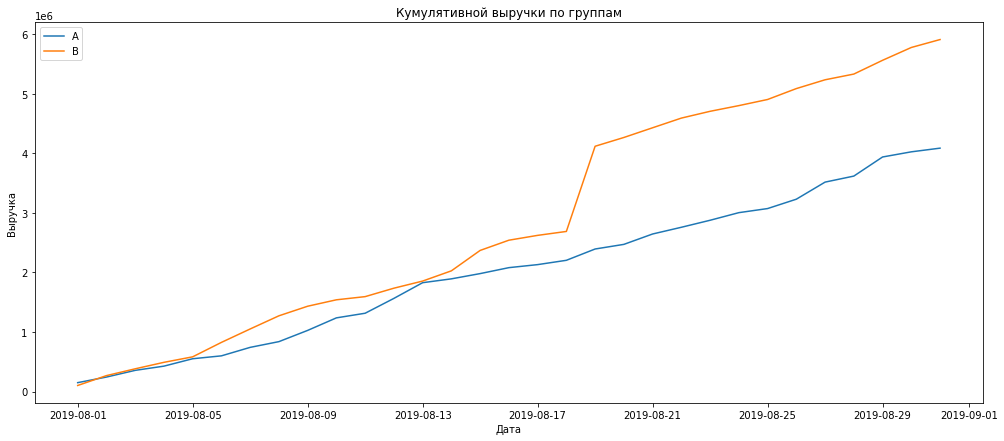

In [21]:
# строим график кумулятивной выручки по группам
plt.figure(figsize=(17,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивной выручки по группам')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.legend()
plt.show()

**Вывод**

На графике мы видим, что с пятого дня выручка пользователей из группы В стала расти выше выручки группы А. Однако резкий скачек выручки пользователей из группы В выглядит аномально большим, который, вероятнее всего, вызвын небольшим количеством больших заказов. Исходя из этого мы не можем делать выводы о результате теста на данном этапе.

### Кумулятивный средний чек по группам

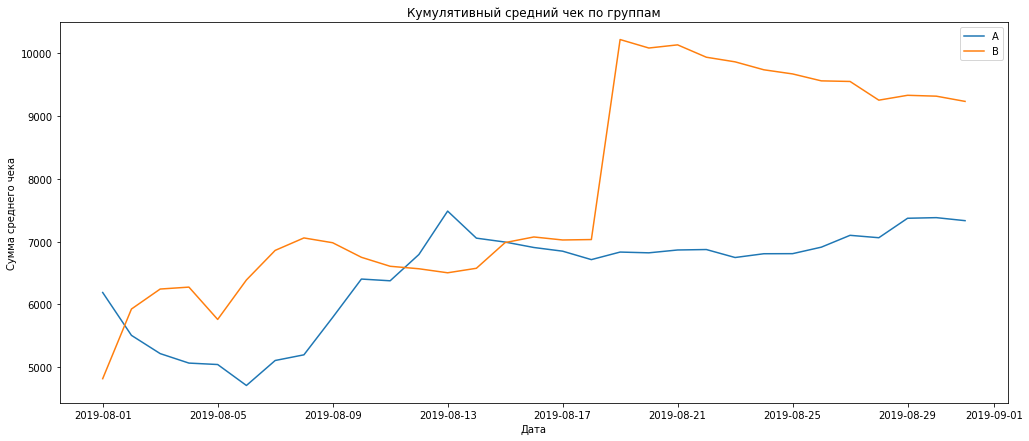

In [22]:
# строим график кумулятивной выручки по группам
plt.figure(figsize=(17,7))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel("Дата")
plt.ylabel("Сумма среднего чека")
plt.legend()
plt.show()

**Вывод**

Здесь мы так же видим очень резкий скачек среднего чека с последующим снижением в группе В в то время, как у группы А средний чек держится на одном уровне с середины месяца, что только подтвержает нашу догадку о появлении какого-то количества слишком больших заказов.

### Относительное изменение кумулятивного среднего чека группы В к группе А

In [23]:
# создадим объединеную таблицу кумулятивных данных групп с сохранением столбцов revenue и orders обеих групп
merged_cumulative_revenue = (cumulative_revenue_a
                                 .merge(cumulative_revenue_b,
                                        left_on='date',
                                        right_on='date',
                                        how='left',
                                        suffixes=['_a', '_b'])
                            )
merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


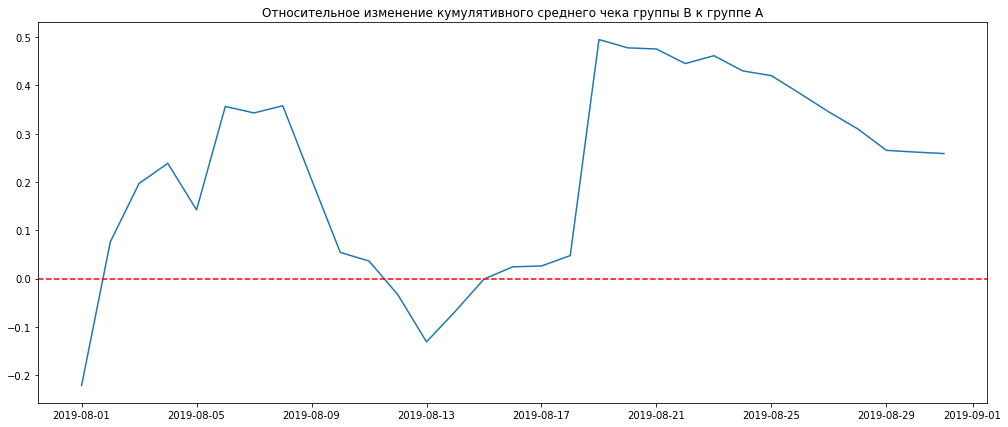

In [24]:
# cтроим график отношения кумулятивного среднего чека группы B к группе А
plt.figure(figsize=(17,7))
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b']) / 
         (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a'])-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

**Вывод**

Относительное изменение кумулятивного среднего чека группы В повторяет поведение графика кумулятивного среднего чека.

### Кумулятивное среднее количество заказов на посетителя по группам

In [25]:
# к общей кумулятивной таблице добавим столбец с конверсией 
# и создадим две отдельные таблицы с разделением по группам
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


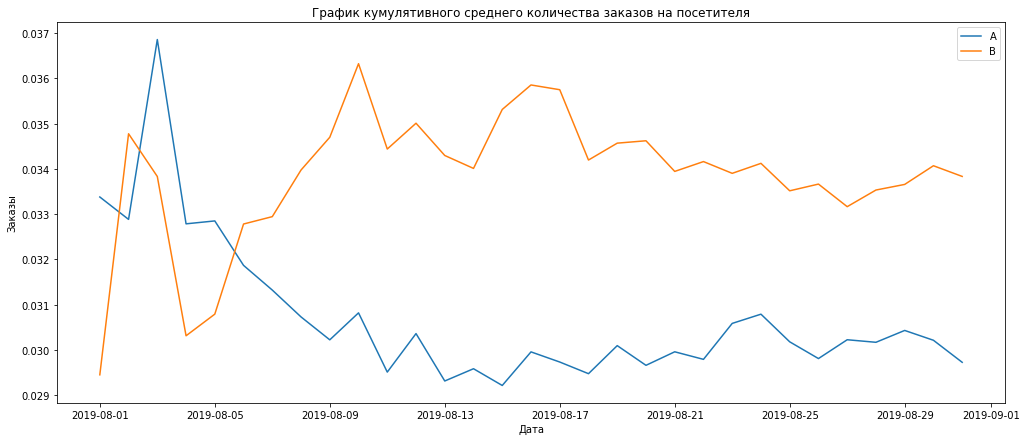

In [26]:
# строим график кумулятивной конверсии по группам
plt.figure(figsize=(17,7))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A');
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B');
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.xlabel("Дата")
plt.ylabel("Заказы")
plt.legend()
plt.show()

**Вывод**

В начале теста сегмент А имел большую конверсию (3,7% в пике), но уже после 2019-09-05 графики пересеклись и конверсия сегмента B стала выше и сохраняла свое превосходство вполть до конца теста (3,4% в группе B против 3% в группе A)

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

In [27]:
# создадим объединенную таблицу кумулятивной конверсии с сохранение столбцов conversion 
merged_cumulative_conversions = (cumulative_data_a[['date','conversion']]
                                     .merge(cumulative_data_b[['date','conversion']],
                                            left_on='date', right_on='date',
                                            how='left',
                                            suffixes=['_a', '_b'])
                                )
merged_cumulative_conversions.head()   

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


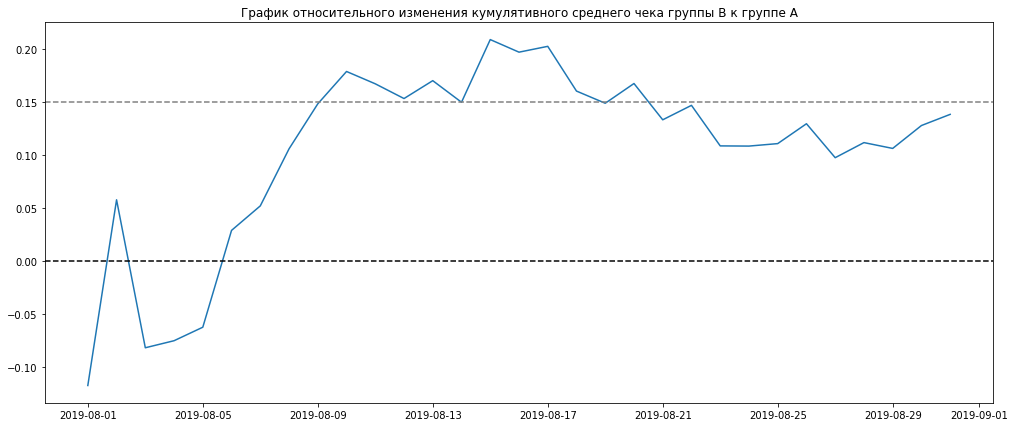

In [28]:
# строим график отношения кумулятивной конверсии группы B к группе А 
plt.figure(figsize=(17,7))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversion_b'] / merged_cumulative_conversions['conversion_a']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

**Вывод**

Почти с самого начала теста группа B лидирует по конверсии и достигает пика 2019-08-17. Начиная с этой даты конверсия снижается с 2% в пике до ~1,5%

## Изучение выбросов в стоимости и количестве заказов

### Точечный график количества заказов пользователей

In [29]:
# создадим таблицу с количеством заказов на каждого пользователя
orders_per_user = (orders.drop(['group', 'revenue', 'date'], axis=1)
                   .groupby('visitor_id', as_index=False)
                   .agg({'transaction_id' : pd.Series.nunique})
                  )
orders_per_user.columns = ['visitor_id','orders']
orders_per_user.sort_values(by='orders', ascending=False).head(11)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


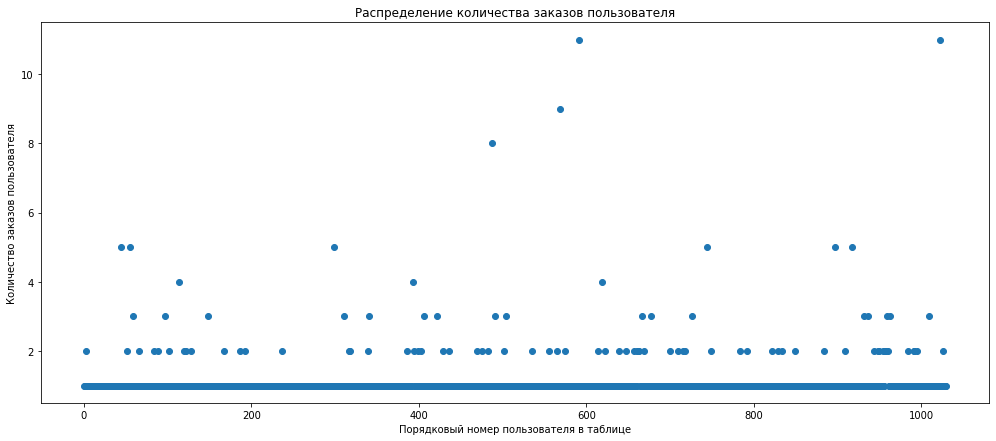

In [30]:
# выведем точечный график распределения количества заказов по пользователям
plt.figure(figsize=(17,7))
plt.scatter(pd.Series(range(0,len(orders_per_user['orders']))), orders_per_user['orders'])
plt.title('Распределение количества заказов пользователя')
plt.ylabel('Количество заказов пользователя')
plt.xlabel('Порядковый номер пользователя в таблице')
plt.show()

**Вывод**

Большинство пользователей делают заказ только один раз, но при этом есть доля пользователей, которая совершает по 2 заказа и небольшое количество пользователей, которые совершают от 3 до 11 заказов за месяц.

### Определение пользователей с аномальным количеством заказов

In [31]:
#посчитаем 90-й, 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(orders_per_user['orders'], [90, 95, 99]))

[1. 2. 4.]


**Вывод**

Исходя из полученных рузльтатов, мы можем утверждать, что доля пользователей совершивших более 2 двух заказов составляет 5%, а более 4 заказов всего 1%. То есть, пользователи, которые сделали 3 и более заказов являются для нас аномальными.

### Точечный график стоимости заказов

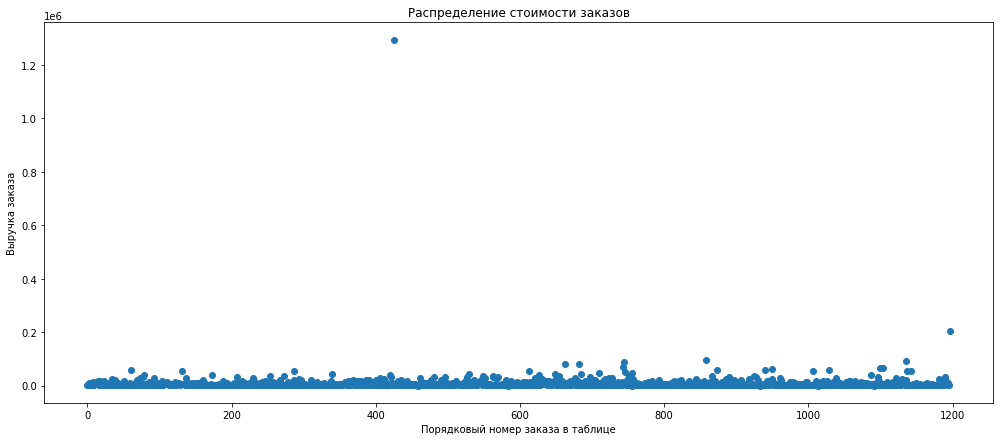

In [32]:
# выведем точечный график распределение стоимости заказов
plt.figure(figsize=(17,7))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.ylabel('Выручка заказа')
plt.xlabel('Порядковый номер заказа в таблице')
plt.show()

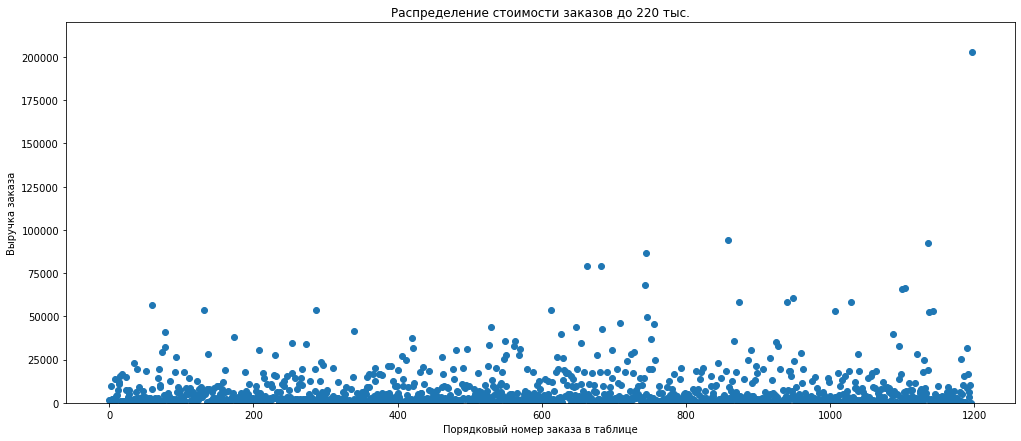

In [33]:
# выведем точечный график распределение стоимости заказов до 220 тысяч
plt.figure(figsize=(17,7))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Распределение стоимости заказов до 220 тыс.')
plt.ylabel('Выручка заказа')
plt.xlabel('Порядковый номер заказа в таблице')
plt.ylim(0,220000)
plt.show()

**Вывод**

На графиках распределения мы видим, что основная масса сумм заказов располагаются на уровне до 25 тыс. При это часто встречаются заказы от 25 до 60 тысяч и есть единичные заказы от 75тыс до 1.2млн.

### Определение аномальных заказов

In [34]:
# посчитаем 90-й, 95-й и 99-й перцентили стоимостей заказов
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


**Вывод**

Исходя из результатов, мы видим, что основная масса заказов приходится до 18тыс. Заказы со стоимостью 28тыс составляют 5%, а заказы выше 58тыс составляют 1%. Значит, все заказы выше 28тыс, мы можем определить как аномальные.



## Изучение статистических значимостей

### Подготовка сырых данных

In [35]:
# создадим таблицы ежедневного количества пользователей по группам
# и таблицы с кумулятивным количеством пользователей к дате по группам
visitors_daily_A = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_per_date_A']

visitors_daily_B = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_per_date_B']


visitors_cummulative_A = visitors_daily_A.apply(lambda x: 
                            visitors_daily_A[visitors_daily_A['date'] <= x['date']].agg({
                                'date' : 'max', 'visitors_per_date_A' : 'sum'}), axis=1)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

visitors_cummulative_B = visitors_daily_B.apply(lambda x: 
                            visitors_daily_B[visitors_daily_B['date'] <= x['date']].agg({
                                'date' : 'max', 'visitors_per_date_B' : 'sum'}), axis=1)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

In [36]:
# создадим таблицы с количеством заказов и размером выручки по группам
# и затем создадим таблицы с кумулятивным количеством заказов и выручки
orders_daily_A = orders[orders['group']=='A'][['date', 'transaction_id','visitor_id', 
                                               'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_daily_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_daily_B = orders[orders['group']=='B'][['date', 'transaction_id','visitor_id', 
                                               'revenue']].groupby(
    'date', as_index=False).agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_daily_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']


orders_cummulative_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_per_date_A' : 'sum',
                'revenue_per_date_A' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_A.columns = ['date', 'orders_сummulative_A', 'revenue_сummulative_A']

orders_cummulative_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']].agg({
                'date' : 'max',
                'orders_per_date_B' : 'sum',
                'revenue_per_date_B' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulative_B.columns = ['date', 'orders_сummulative_B', 'revenue_сummulative_B']

In [37]:
# объединим все созданные таблицы в одну по дате
data = (visitors_daily_A
        .merge(visitors_daily_B, left_on='date', right_on='date', how='left')
        .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
        .merge(orders_daily_A, left_on='date', right_on='date', how='left')
        .merge(orders_daily_B, left_on='date', right_on='date', how='left')
        .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
        .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
       )

In [38]:
# создадим таблицы с количеством заказов по пользователям для каждой группы
orders_by_visitors_A = orders[orders['group']=='A'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

orders_by_visitors_A.columns = ['visitor_id', 'orders']

orders_by_visitors_B = orders[orders['group']=='B'].groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

orders_by_visitors_B.columns = ['visitor_id', 'orders']

sample_A = pd.concat([orders_by_visitors_A['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitors_per_date_A'].sum() -
                         len(orders_by_visitors_A['orders'])),
                               name='orders')],axis=0)

sample_B = pd.concat([orders_by_visitors_B['orders'],
                     pd.Series(0, index=np.arange(
                         data['visitors_per_date_B'].sum() -
                         len(orders_by_visitors_B['orders'])), 
                               name='orders')],axis=0)

### Cтатистическая значимость различий в конверсии. "Сырые" данные

Проверим, есть ли статическая значимость различий в конверсиях и какой относительный прирост конверсии группы B с помощью использования непараметрического критерия Манна-Уитни.

Сфорулируем нулевую гипотезу, что статистически значимых различий в конверсии между группами нет. А альтернативная гипотеза - статистически значимые различия в конверсии между группами есть.

А уровень статистической значимости alpha мы возьмем 0.05.

In [39]:
# посчитаем критерий Манна-Уитни к конверсии
# и относительный прирост конверсии группы B

print('Значение p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sample_A, sample_B)[1]))

if st.mannwhitneyu(sample_A, sample_B)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Относительный прирост конверсии группы B: {:.2%}'.format((sample_B.mean()/sample_A.mean()) - 1))

Значение p-value для конверсий: 0.017
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 13.81%


**Вывод**

Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. Поэтому мы придерживаемся альтернативной гипотезе, что различая в конверсии есть, а относительный прирост конверсии группы В составляет 13.81%. Однако в этих выборках есть выбросы.

### Cтатистическая значимость различий в среднем чеке заказа. "Сырые" данные

Проверим, есть ли статистическая значимость различий в среднем чеке пользователей между группами используя критерий Манна-Уитни, сформулировав нулевую гипотезу, что различий в среднем чеке групп нет, а альтернативная гипотеза, что различия в среднем чеке есть.

Уровень стат. значимости alpha = 0.05

И посчитаем относительный прирост среднего чека в группе В.

In [40]:
# посчитаем критерий Манна-Уитни к среднему чеку
# и относительный прирост среднего чека группы B

pvalue_mean_check = st.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(pvalue_mean_check))

if pvalue_mean_check < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B: {:.2%}'
        .format((orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean()) - 1))

Значение p-value для среднего чека: 0.729
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: 25.87%


**Вывод**

Отвергнуть нулевую гипотезу о том, что нету значимых различий в среднем чеке групп не удалось, но при этом относительный прирост среднего чека в группе В составляет 25.87%, что может означать сильное влияние аномальных заказов.

### Подготовка очищенных данных

In [41]:
# создадим таблицы с аномальными пользователей и выведем их количество и долю
visitors_many_orders = pd.concat([orders_by_visitors_A.query('orders > 2')['visitor_id'], 
                                  orders_by_visitors_B.query('orders > 2')['visitor_id']], axis = 0)
visitors_expensive_orders = orders.query('revenue > 28000')['visitor_id']


abnormal_visitors = (pd.concat([visitors_many_orders, visitors_expensive_orders], axis = 0)
                     .drop_duplicates()
                     .sort_values()
                    )

print('Количество аномальных пользователей:',len(abnormal_visitors))
print('Доля аномальных пользователей {:.2%}'.format(len(abnormal_visitors) / len(orders['visitor_id'].unique())))

Количество аномальных пользователей: 74
Доля аномальных пользователей 7.18%


In [42]:
# создадим таблицы с количеством заказов по пользователям для каждой группы без аномальных пользователей
sample_A_filt = pd.concat(
                    [orders_by_visitors_A[np.logical_not(orders_by_visitors_A['visitor_id']
                            .isin(abnormal_visitors))]['orders'],
                            pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - 
                            len(orders_by_visitors_A['orders'])),
                            name='orders')],
                            axis=0
                         )

sample_B_filt = pd.concat(
                    [orders_by_visitors_B[np.logical_not(orders_by_visitors_B['visitor_id']
                           .isin(abnormal_visitors))]['orders'],
                           pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - 
                           len(orders_by_visitors_B['orders'])),
                           name='orders')],
                           axis=0
                         )

**Вывод**

Доля аномальных пользоваателей, которые совершили более 2 заказов и на сумму больше 28тыс составляет 7.18%, что достаточно много, но это позволит более точно изучить зависимости на более нормализованных данных.

### Cтатистическая значимость различий в конверсии. "Очищенные" данные

Проверим, есть ли статическая значимость различий в конверсиях c помощью критерия Манна-Уитни и узнаем какой относительный прирост конверсии группы B по очищенным данным.

Сфорулируем нулевую гипотезу, что статистически значимых различий в конверсии между группами нет. А альтернативная гипотеза - статистически значимые различия в конверсии между группами есть.

Уровень стат. значимости `alpha = 0.05`

In [43]:
# посчитаем критерий Манна-Уитни к конверсии для "очищенных" данных
# и относительный прирост конверсии группы B
print('Значение p-value для конверсий: {:.3f}'.format(st.mannwhitneyu(sample_A_filt, sample_B_filt)[1]))

if st.mannwhitneyu(sample_A_filt, sample_B_filt)[1] < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост конверсии группы B: {:.2%}'.format((sample_B_filt.mean() / sample_A_filt.mean()) - 1))

Значение p-value для конверсий: 0.013
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 17.27%


**Вывод**

По очищенным данным результат такой же - различии в конверсии между группами есть. А прирост конверсии у группы В составляет 17.27%.

### Cтатистическая значимость различий в среднем чеке заказа. "Очищенные" данные

Проверим, есть ли статистическая значимость различий в среднем чеке пользователей между группами в очищенных данных с помощью критерия Манна-Уитни, сформулировав нулевую гипотезу, что различий в среднем чеке групп нет, а альтернативная гипотеза, что различия в среднем чеке есть.

Уровень стат. значимости alpha = 0.05

И посчитаем относительный прирост среднего чека в группе В по очищенным данным.

In [44]:
# посчитаем критерий Манна-Уитни к среднему чеку для очищенных данных 
# и относительный прирост среднего чека группы В

filtered_pvalue_mean_check = st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == "A", np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue'],
    orders[np.logical_and(orders['group'] == "B", np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue'])[1]

print('Значение p-value для среднего чека: {:.3f}'.format(filtered_pvalue_mean_check))


if filtered_pvalue_mean_check < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

    
print('Относительный прирост среднего чека группы B: {:.2%}'.format(
    (orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue'].mean()/
     orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormal_visitors)))]['revenue']
     .mean()) - 1))

Значение p-value для среднего чека: 0.738
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: -1.96%


**Вывод**

Здесь так же мы не можем отвергнуть нулевую гипотезу, а значит статистически значимых различий в среднем чеке нету между группами. Однако относительный прирост среднего чека группы В на очищенных данных изменился до -1.96%. Но это может быть вызвано тем, что количество заказов у группы B больше, чем у группы A, за счет чего средний чек становится меньше.

## Итоговый вывод

Перед запуском A/B-теста, нам предстояло выбрать наиболее перспективную гипотезу. У нас сформировался список из 8 гипотез, приоритеты которых мы определили с помощью фреймоворков для приоритезации гипотез - ICE и RICE.

Так как фреймворк ICE не учитывает охват изменений, а наши гипотезы требуют взаимодейтсвия с как можно большим количеством пользователей - мы отказались от фреймоврка ICE и использовали фреймворк RICE. Благодаря этому мы определили, что наиболее перспективная гипотеза с наивысшим охватом, хорошими показателями влияния и уверенности при средних затратах на внедрение, является гипотеза «Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок».

При изучении данных для анализа A/B-теста мы обнаружили, что 58 пользователей попали в обе группы теста, тем самым частично исказив результаты.

Проведя анализ результатов A/B-теста мы пришли к следующим выводам:

Конверсия группы B выше, чем у группы А, начиная с 5 дня, что привело к большему числу заказов и немного размыло средний чек.
С середины месяца динамика конверсий обеих групп стабилизировалась и группа В показывает более высокий уровень конверсии, чем группа А.
Кумулятивная выручка у группы В выше, чем у группы А.
В группе В оказались пользователи, которые совершили крупные заказы, что подняло средний чек группы. Учитывая то, что в группе А такого поведения не наблюдалось - это может быть новой точкой роста и требует изучения.
Проведя статистический анализ результатов теста мы пришли к выводам:

Статистические значимые различия в конверсии между группами теста есть, как на сырых, так и на отфильтрованных данных.
Статистических значимых различий в среднем чеке между группами теста нету, как на сырых, так и на отфильтрованных данных.
Исходя из вышеперечисленого, мы можем останавливать тест и зафиксировать победу группы В.

Так же, мы можем отметить следующие факты:

Основная доля пользователей совершает только один заказ в месяц и только 5% совершает более двух заказов и 1% более 4 заказов, при максимальном количестве заказов сделанных одним пользователем - 11шт.
Основная доля пользователей совершает заказы до 18тыс. Только 5% пользователей совершают заказы до 28тыс и 1% совершают заказы на более 58%. При этом в изучаемых данных есть один пользователь совершивший заказ на 210 тыс и один пользователей на 1.2млн. В то время как остальные пользователи достигали максимально уровня заказа на 100тыс.